In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib.pyplot import figure
import time

In [3]:
AV = [0, 20, 0, 0, 0, 0]
IV = [30, 45, 60, 40, 40, 40]
DO = [15, 20, 25, 15, 20, 25]
N = 240
V = 441
x1 = 21
x2 = 21
nsrcs = 6

# Question 1.1

In [4]:
TC = np.zeros((240,6))

for i in range(6):
    current_TC = np.zeros(240)
    
    samples = N
    initial = AV[i]
    period = IV[i]
    duration = DO[i]
    
    one = 1
    n = 1
    
    initial_one = True
    if initial != 0:
        initial_one = False
        
    while samples > 0:
        current_period_left = period
        
        # Ensure that data does not exceed 240 samples
        if samples < duration:
            for j in range(samples):
                current_TC[n+j-1] = one
            n += samples
            samples = 0
            continue
        
        while current_period_left != 0:
            # Account for initial delay
            if initial_one == False:
                one = 0
                for j in range(initial):
                    current_TC[n+j-1] = one
                n += initial
                current_period_left -= initial
                initial_one = True
                one = (one+1)%2
                continue
            
            else:
                if current_period_left > duration:
                    for j in range(duration):
                        current_TC[n+j-1] = one
                    n += duration
                    one = (one+1)%2
                    current_period_left -= duration
                    continue
                
                else:
                    for j in range(current_period_left):
                        current_TC[n+j-1] = one
                    n += current_period_left
                    current_period_left = 0
                    one = (one+1)%2
                    continue
        samples -= period
    TC[:,i] = current_TC 

In [5]:
def standardise_data(data):
    standardised_data = preprocessing.scale(data)
    return standardised_data

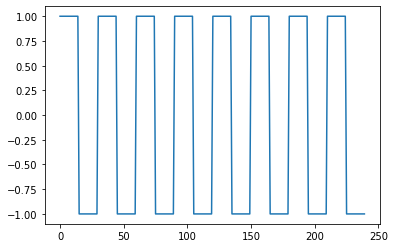

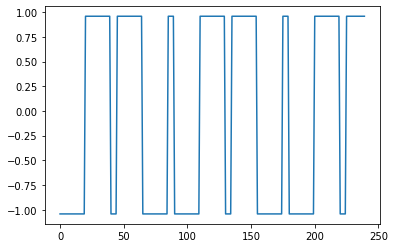

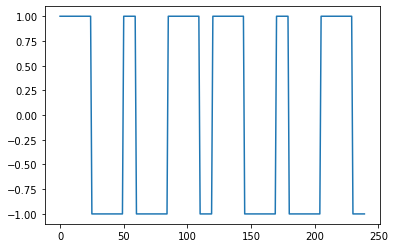

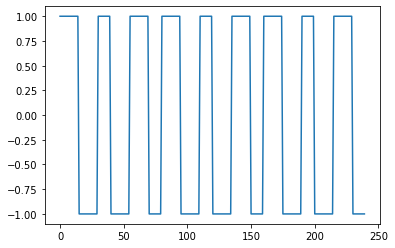

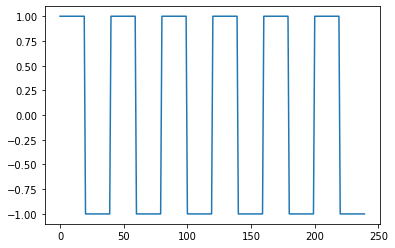

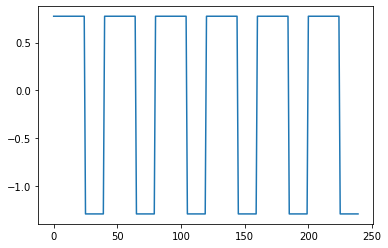

In [6]:
# Standardise data and plot
TC_standardised = standardise_data(TC)

for i in range(6):
    plt.plot(TC_standardised[:, i])
    plt.show()

# Question 1.2

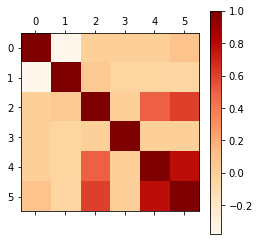

In [7]:
# Correlation matrix of all TCs

plt.matshow(np.corrcoef(TC_standardised.transpose()), cmap="OrRd")
plt.colorbar()
plt.show()

# Question 1.3

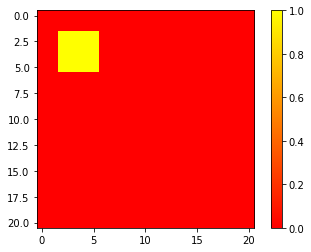

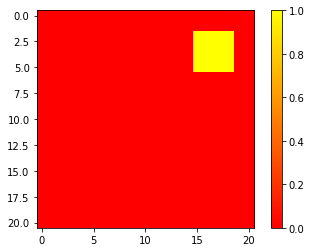

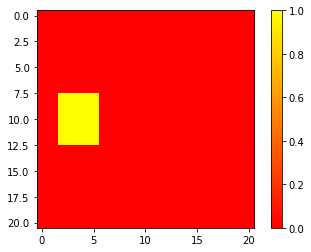

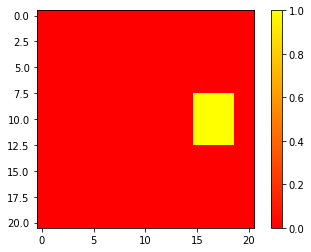

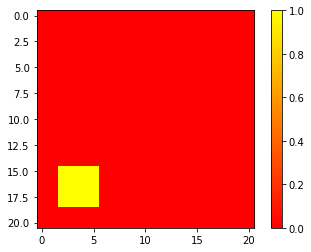

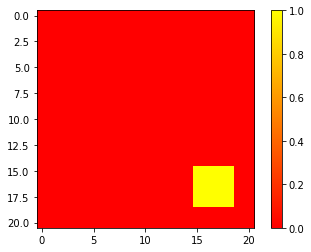

In [8]:
tmpSM = np.zeros((6,21,21))

tmpSM[0][2:6, 2:6] = 1
tmpSM[1][2:6, 15:19] = 1
tmpSM[2][8:13, 2:6] = 1
tmpSM[3][8:13, 15:19] = 1
tmpSM[4][15:19, 2:6] = 1
tmpSM[5][15:19, 15:19] = 1

for i in range(len(tmpSM)):
    plt.imshow(tmpSM[i], interpolation='none', cmap="autumn")
    plt.colorbar()
    plt.show()

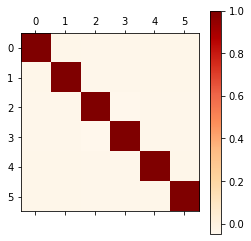

In [9]:
# Reshape tmpSM into size 6 x 441

SM = tmpSM.reshape(tmpSM.shape[0], (tmpSM.shape[1]*tmpSM.shape[2]))

plt.matshow(np.corrcoef(SM), cmap="OrRd")
plt.colorbar()
plt.show()

# Question 1.4

In [10]:
def generate_noise():
    temporal = np.random.normal(0, np.sqrt(0.25), size=240*6)
    spatial = np.random.normal(0, np.sqrt(0.015), size=6*441)
    
    return temporal, spatial

In [11]:
temporal, spatial = generate_noise()

gamma_t = temporal.reshape(240, 6)
gamma_s = spatial.reshape(6, 441)

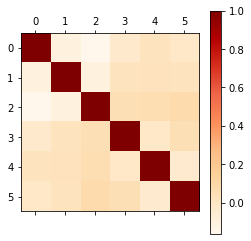

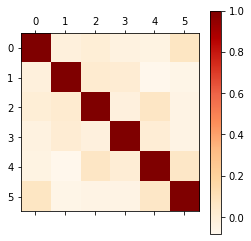

In [12]:
# Temporal CM
plt.matshow(np.corrcoef(np.transpose(gamma_t)), cmap="OrRd")
plt.colorbar()
plt.show()

# Spatial CM
plt.matshow(np.corrcoef(gamma_s), cmap="OrRd")
plt.colorbar()
plt.show()

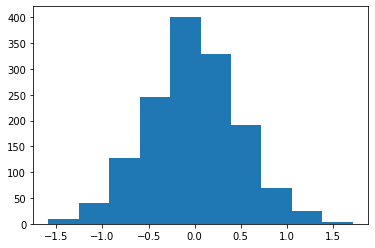

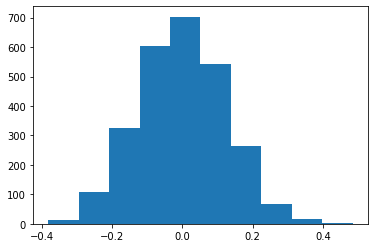

In [13]:
# Temporal source histogram
plt.hist(temporal)
plt.show()

# Spatial source histogram
plt.hist(spatial)
plt.show()

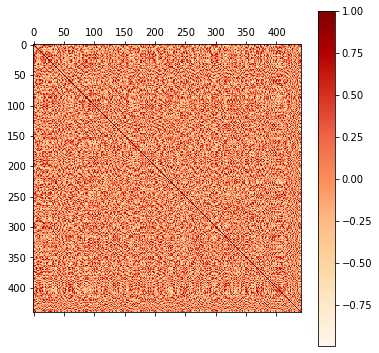

In [14]:
gamma_ts = np.matmul(gamma_t, gamma_s)

plt.rcParams['figure.figsize'] = [6, 6]
plt.matshow(np.corrcoef(gamma_ts.transpose()), cmap="OrRd")
plt.colorbar()
plt.show()

# Question 1.5

In [15]:
def generate_synthetic_dataset(TC, SM, t_noise, s_noise):
    gamma_t = t_noise.reshape(240, 6)
    gamma_s = s_noise.reshape(6, 441)
    
    t_incl_noise = TC + gamma_t
    s_incl_noise = SM + gamma_s
    
    synthetic_dataset = np.matmul(t_incl_noise, s_incl_noise)
    
    return synthetic_dataset

In [16]:
# Generate synthetic dataset

X = generate_synthetic_dataset(TC_standardised, SM, temporal, spatial)

# temporal_incl_noise = TC_standardised + gamma_t
# spatial_incl_noise = SM + gamma_s

# # Generate synthetic dataset
# X = np.matmul(temporal_incl_noise, spatial_incl_noise)

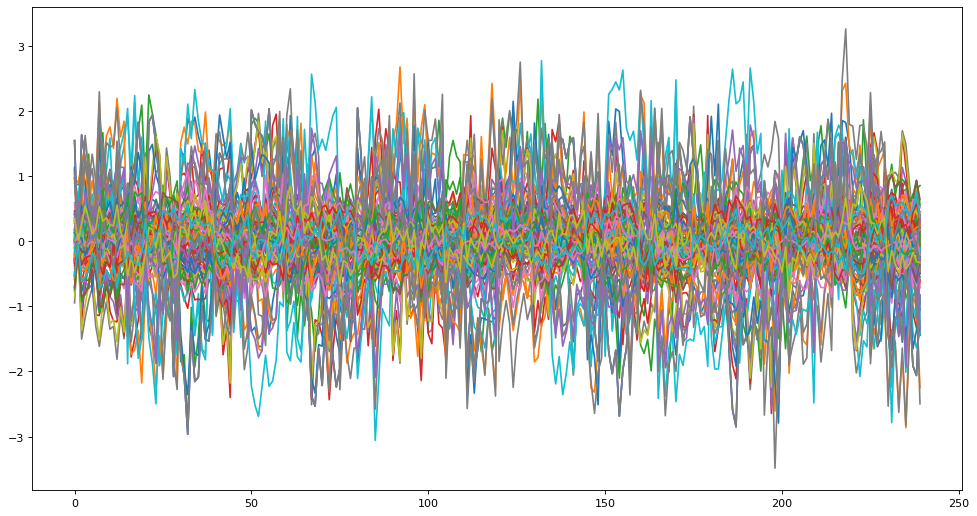

In [17]:
selection = np.random.choice(X.shape[1], size=100)

figure(figsize=(15, 8), dpi=80)

for i in selection:
    plt.plot(X[:, i])

# plt.plot(X[:, 1])

In [18]:
# Standardise X

X_standardised = standardise_data(X)

# Question 2.1

In [19]:
D = TC_standardised
DTD = np.matmul(D.transpose(), D)
DTX = np.matmul(D.transpose(), X_standardised)

A_lsr = np.matmul(np.linalg.inv(DTD), DTX)
D_lsr = np.matmul(X_standardised, A_lsr.transpose())

print(X_standardised.shape, A_lsr.shape)
print(D_lsr.shape, D.shape)

(240, 441) (6, 441)
(240, 6) (240, 6)


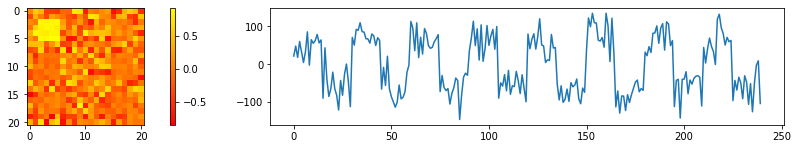

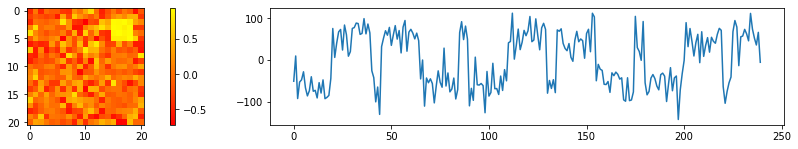

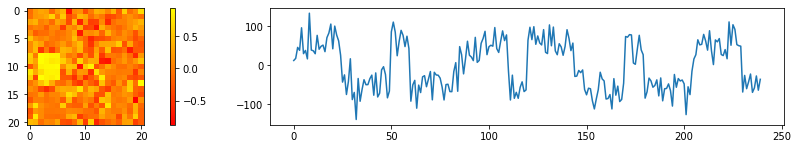

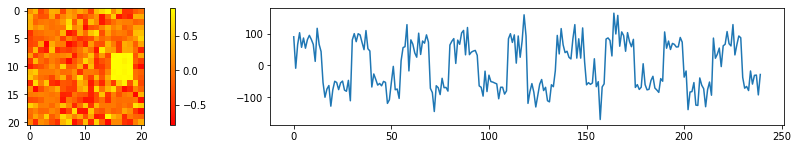

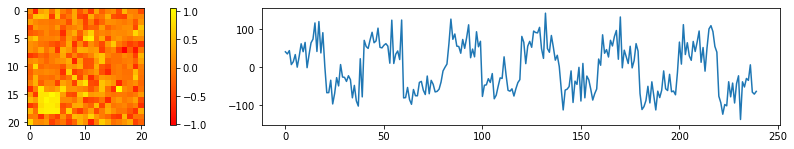

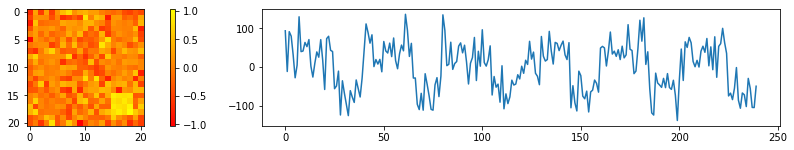

In [20]:
# Retrieved sources plot

for i in range(6):
    figure(figsize=(15,12))
    
    plt.subplot(6, 2, 1)
    spatial_map = np.reshape(A_lsr[i], (21,21))
    plt.imshow(spatial_map, interpolation='none', cmap="autumn")
    plt.colorbar()
    
    plt.subplot(6, 2, 2)
    plt.plot(D_lsr[:,i])
    
    plt.tight_layout()
    plt.show()

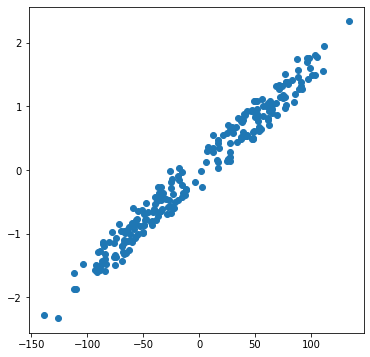

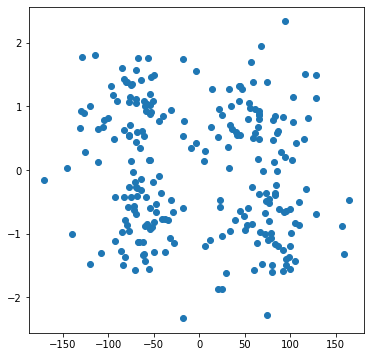

In [21]:
# 3rd column of D_lsr and 30th column of standardised X
plt.scatter(D_lsr[:,2], X_standardised[:,9*21+2])
plt.show()

# # 4th column of D_lsr and 30th column of standardised X
plt.scatter(D_lsr[:,3], X_standardised[:,9*21+2])
plt.show()

# Question 2.2

In [22]:
lambda_param = 0.5
lambda_V = lambda_param*V
identity = np.identity(DTD.shape[0])

ARR = np.matmul(np.linalg.inv(DTD + lambda_V*identity), DTX)
DRR = np.matmul(X_standardised, ARR.transpose())

In [23]:
c_TLSR = np.zeros(6)
c_TRR = np.zeros(6)

for i in range(6):
    c_TLSR[i] = np.corrcoef(TC_standardised[:,i], D_lsr[:, i])[0][1]
    c_TRR[i] = np.corrcoef(TC_standardised[:,i], DRR[:, i])[0][1]
    
print(sum(c_TRR), sum(c_TLSR))

5.395496643514212 5.23237068902541


In [24]:
lambda_thousand = 1000
lambda_thousand_V = lambda_thousand*441

ARR_thousand = np.matmul(np.linalg.inv(DTD + lambda_thousand_V*identity), DTX)

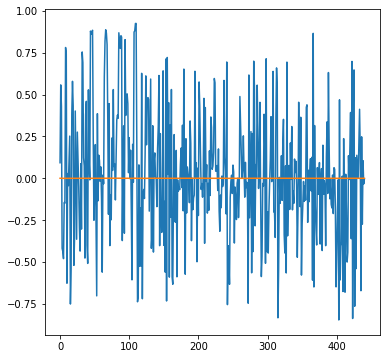

In [25]:
plt.plot(A_lsr[0, :])
plt.plot(ARR_thousand[0, :])
plt.show()

# Question 2.3

In [26]:
def LR(TC_array, rho, X_standardised):

    N = 240
    x1 = 21
    x2 = 21
    nsrcs = 6

    step = 1/(np.linalg.norm(np.matmul(TC_array, TC_array.transpose())) * 1.1)
    thr = rho*N*step

    Ao = np.zeros((nsrcs, 1))
    A = np.zeros((nsrcs, 1))
    Alr = np.zeros((nsrcs, x1*x2))

    for k in range(x1*x2):
        A = Ao + step * (np.matmul(TC_array.transpose(), (X_standardised[:,k].reshape(240,1)) - (np.matmul(TC_array, Ao)) ))
        A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.zeros(nsrcs), np.transpose(abs(A)-thr)).transpose())
        for i in range(10):
            Ao = A
            A = Ao + step * (np.matmul(TC_array.transpose(), (X_standardised[:,k].reshape(240,1)) - (np.matmul(TC_array, Ao)) ))
            A = (1/(1+thr)) * (np.sign(A) * np.maximum(np.zeros(nsrcs), np.transpose(abs(A)-thr)).transpose())
        Alr[:,k] = A.transpose()
    
    Dlr = np.matmul(X_standardised, Alr.transpose())
    
    return Alr, Dlr

In [27]:
def MSE(Alr, Dlr):
    mse = 0
    for n in range(441):
        mse += ((abs(X_standardised - np.matmul(Dlr, Alr**2)))**2)/(N*V)
    return mse

In [28]:
%%time

rho = np.arange(0,1.05,0.05)

mse_array = np.zeros((10,21))

for i in range(10):
    temporal, spatial = generate_noise()
    X = generate_synthetic_dataset(TC_standardised, SM, temporal, spatial)
    X_standardised = standardise_data(X) 
    for j in range(len(rho)):
        total_mse = 0
        Alr, Dlr = LR(TC_standardised, rho[j], X_standardised)
        total_mse += MSE(Alr, Dlr)
        mse_array[i][j] = np.mean(total_mse)

CPU times: user 3min 49s, sys: 7min 53s, total: 11min 43s
Wall time: 1min 2s


In [29]:
# Compute mean MSE for each value of rho against 10 realisations

lowest = 10
lowest_rho = 0

for i in range(mse_array.shape[1]):
    current_rho_mean = np.mean(mse_array[:,i])
    if current_rho_mean < lowest:
        lowest = current_rho_mean
        lowest_rho = rho[i]
        
print("Minimum MSE:", lowest, "rho:", lowest_rho)

Minimum MSE: 0.003569899899852169 rho: 0.5


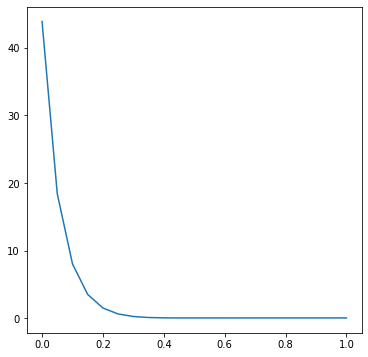

In [30]:
mean_mse = list()

for i in range(mse_array.shape[1]):
    mean_mse.append(sum(mse_array[:, i]))

plt.plot(rho, mean_mse)
plt.show()

# Question 2.4

In [31]:
# Ensure that all parameters are under the same dataset
temporal, spatial = generate_noise()
X = generate_synthetic_dataset(TC_standardised, SM, temporal, spatial)
X_standardised = standardise_data(X)

D = TC_standardised
DTD = np.matmul(D.transpose(), D)
DTX = np.matmul(D.transpose(), X_standardised)

ARR = np.matmul(np.linalg.inv(DTD + lambda_V*identity), DTX)
DRR = np.matmul(X_standardised, ARR.transpose())

# LR parameters for optimal rho
ALR, DLR = LR(TC_standardised, lowest_rho, X_standardised)

# Correlation vectors
c_TRR = np.zeros(6)
c_SRR = np.zeros(6)
c_TLR = np.zeros(6)
c_SLR = np.zeros(6)

for i in range(6):
    c_TRR[i] = np.corrcoef(TC_standardised[:,i], DRR[:, i])[0][1]
    c_SRR[i] = np.corrcoef(SM[i,:], ARR[i, :])[0][1]
    c_TLR[i] = np.corrcoef(TC_standardised[:,i], DLR[:, i])[0][1]
    c_SLR[i] = np.corrcoef(SM[i,:], ALR[i, :])[0][1]


In [32]:
print(sum(c_TLR), sum(c_TRR))
print(sum(c_SLR),sum(c_SRR))

5.401416550468449 5.392809389585611
4.370662956944677 2.59854658907592


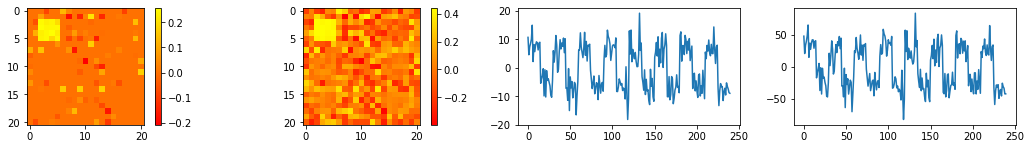

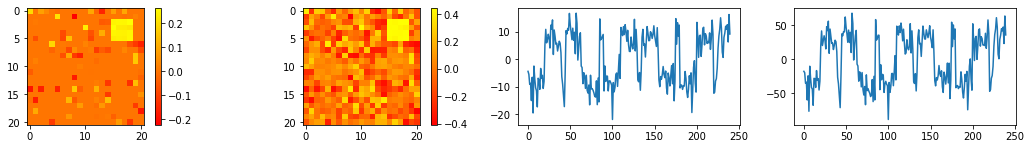

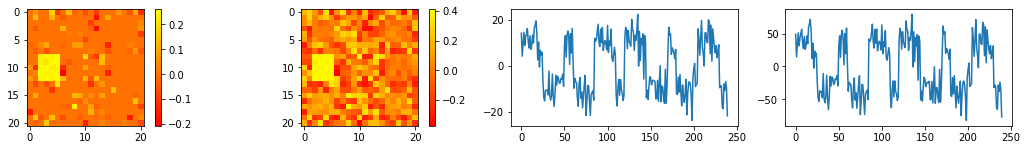

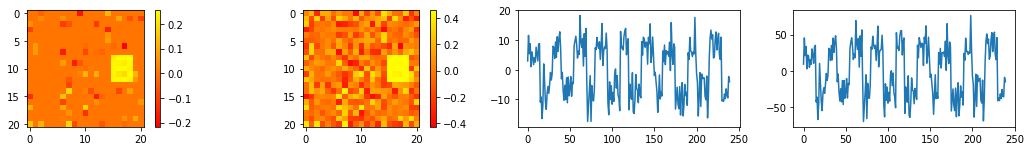

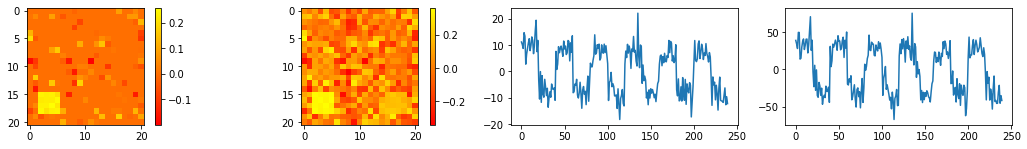

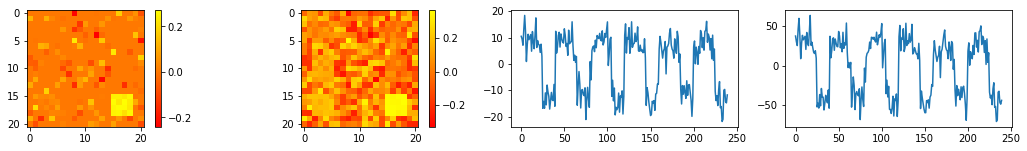

In [56]:
for i in range(6):
    figure(figsize=(15,12))
    
    plt.subplot(6, 4, 1)
    spatial_map_LR = np.reshape(ALR[i], (21,21))
    plt.imshow(spatial_map_LR, interpolation='none', cmap="autumn")
    plt.colorbar()
    
    plt.subplot(6, 4, 2)
    spatial_map_RR = np.reshape(ARR[i], (21,21))
    plt.imshow(spatial_map_RR, interpolation='none', cmap="autumn")
    plt.colorbar()
    
    plt.subplot(6, 4, 3)
    plt.plot(DLR[:, i])
    
    plt.subplot(6, 4, 4)
    plt.plot(DRR[:, i])
    
    plt.tight_layout()
    plt.show()

# Question 2.5

In [68]:
# PCA

U, V, W = np.linalg.svd(TC_standardised, full_matrices=False)

# Eigenvalues
# V

U.shape

(240, 6)